# IFT 6758 - Assignment 2

In [23]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Begin by using the functions created in `q1.py` to make the data more informative and readable. Specifically, complete the following cells:


In [24]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [32]:
# Add a column corresponding to the count of labels called `label_count`
# Here, there is an annoying issue with accessing the positive_labels column

df = pd.read_csv('data/audio_segments.csv')

df['label_count'] = df[' positive_labels'].apply(count_labels)




In [ ]:
# Add a new column called `label_names` with the processed human readable label names instead of label IDS

# Print the time taken for this operation (either using the time module or timeit).
# Since we are only executing this code once it is relatively fine that it takes a couple of minutes.
# However, for a larger dataset, it would be worth the time to speed it up
# (for example by creating a ID -> name dictionary once and using that).

start = time.time()

df[' positive_labels'].apply(convert_ids)

end = time.time()

print(f'Time taken: {end - start} seconds')

In [34]:
# Display the DataFrame and save it to `audio_segments_clean.csv` (without index)

df.to_csv('data/audio_segments_clean.csv', index=False)

### b)

Next, using the clean DataFrame, complete the following cells to better understand the distribution of labels in the dataset. For each plot below, make sure to include appropriate **axis names** and a **title**.

In [ ]:
# Using seaborn, create a histogram of the label count of the rows in the DataFrame

sns.histplot(df['label_count'])
plt.xlabel('Label Count')
plt.ylabel('Frequency')
plt.title('Frequency of Label Count in Audio Segments')
plt.show()

Follow the steps below to create a heatmap showing "correlation" between different labels. 
- Specifically, each cell of the heatmap should correspond to the probability that a sample with the corresponding row label also has the corresponding column label. 
- Just consider the labels ["Piano", "Classical music", "Speech", "Conversation", "Screaming"]. 

Your final plot should look something like this:

![alt text](images/heatmap.png "Heatmap")

In [ ]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# There are a couple ways to approach this, the way we recommend here is to first build a 2D grid where each
# value is the correlation value between the corresponding row/column using the functions created in q1.py.

grid = np.zeros((len(labels), len(labels)))

for i in range(len(labels)):
    for j in range(len(labels)):
        grid[i][j] = get_correlation(df['label_names'], labels[i], labels[j])


# Then using sns.heatmap, create the heatmap, taking advantage of xticklabels and yticklabels to set the label names
# as tick values

sns.heatmap(grid, xticklabels=labels, yticklabels=labels, cmap='viridis')
plt.title('Correlation Between Labels')
plt.show()

## Question 2
Question 2 has no notebook component, just fill out the `q2.py` file.

## Question 3

Download the audio for the following labels using the function created in `q3.py`

In [6]:
from q3 import data_pipeline, rename_files, filter_df

In [ ]:
# Download "Cough"

data_pipeline("data/audio_segments_clean.csv", "Cough")

# Rename to include the start/end times

rename_files("Cough_cut", "data/audio_segments_clean.csv")

In [19]:
# Download "Hammer"

data_pipeline("data/audio_segments_clean.csv", "Hammer")

# Rename to include the start/end times

rename_files("Hammer_cut", "data/audio_segments_clean.csv")

[youtube] 0GNNFBrRz1E: Downloading webpage
[dashsegments] Total fragments: 1
[download] Destination: How to remove your laminate bathroom counter top and not damage the sinks.-0GNNFBrRz1E.m4a


ERROR: giving up after 0 fragment retries


DownloadError: ERROR: giving up after 0 fragment retries

As you've probably noticed, downloading all this audio data is slow (and as such we only required you to download 2 of the labels). In many cases, it is possible to get significant performance increases by using either multiprocessing (https://docs.python.org/3/library/multiprocessing.html) or multithreading (https://docs.python.org/3/library/threading.html) which could for example allow you to download multiple audio files in parallel. 

As a good rule of thumb, use multithreading when your programs is IO-bound (for example here) and multiprocessing when it is CPU-bound (and thus make use of all the cores of your CPU)

## Question 4
For the following cells, use the ID "0GNNFBrRz1E". Complete the functions and run the cells provided below.

In [20]:
import librosa

In [21]:
# Play the audio segment in Jupyter using
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

from IPython.display import Audio

filename = "Hammer_cut/0GNNFBrRz1E.mp3"

y, sr = librosa.load(filename)
Audio(data=y, rate=sr)


[src/libmpg123/parse.c:skip_junk():1260] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_238902/2920716210.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename)
/home/svoglimacci/miniconda3/envs/iFT3700-HW2/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


One way to visualize audio is through the use of mel-spectrograms. At a very high level, Mel-spectrograms convert audio to a 2D image through the use of the Fourier transform (more details can be found here: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)

In [28]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """
    Using librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) write a function
    that:
    1. Loads in audio from a mp3_path (using librosa)
    2. Converts it to a mel-spectrogram (using the parameters provided above)
    3. Applies the logscale transformation to the mel-spectrogram (provided above once again)
    4. Returns the transformed mel-spectrogram

    Make sure to pass the correct sample rate
    """

    y, sr = librosa.load(mp3_path, sr=sample_rate)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=stft_hopsize)
    mel = to_log_scale(mel)
    return mel

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

array([[-6.9077554, -6.9077554, -6.9077554, ..., -1.8187385, -1.6599243,
        -1.7833825],
       [-6.9077554, -6.9077554, -6.9077554, ..., -2.0839288, -1.7708505,
        -1.8443913],
       [-6.9077554, -6.9077554, -6.9077554, ..., -2.7127059, -1.9113641,
        -1.9090252],
       ...,
       [-6.9077554, -6.9077554, -6.9077554, ..., -5.2183557, -5.265298 ,
        -5.4852595],
       [-6.9077554, -6.9077554, -6.9077554, ..., -5.4721413, -5.668661 ,
        -6.1006517],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.1428485, -6.5179386,
        -6.4453945]], dtype=float32)

Audio data can also be visualized by looking at the waveform (i.e. as a line plot of the amplitude values). We will combine both visualizations methods below. The resulting plot should look something like:
![alt text](images/combined_plot.png "Combined Plot")

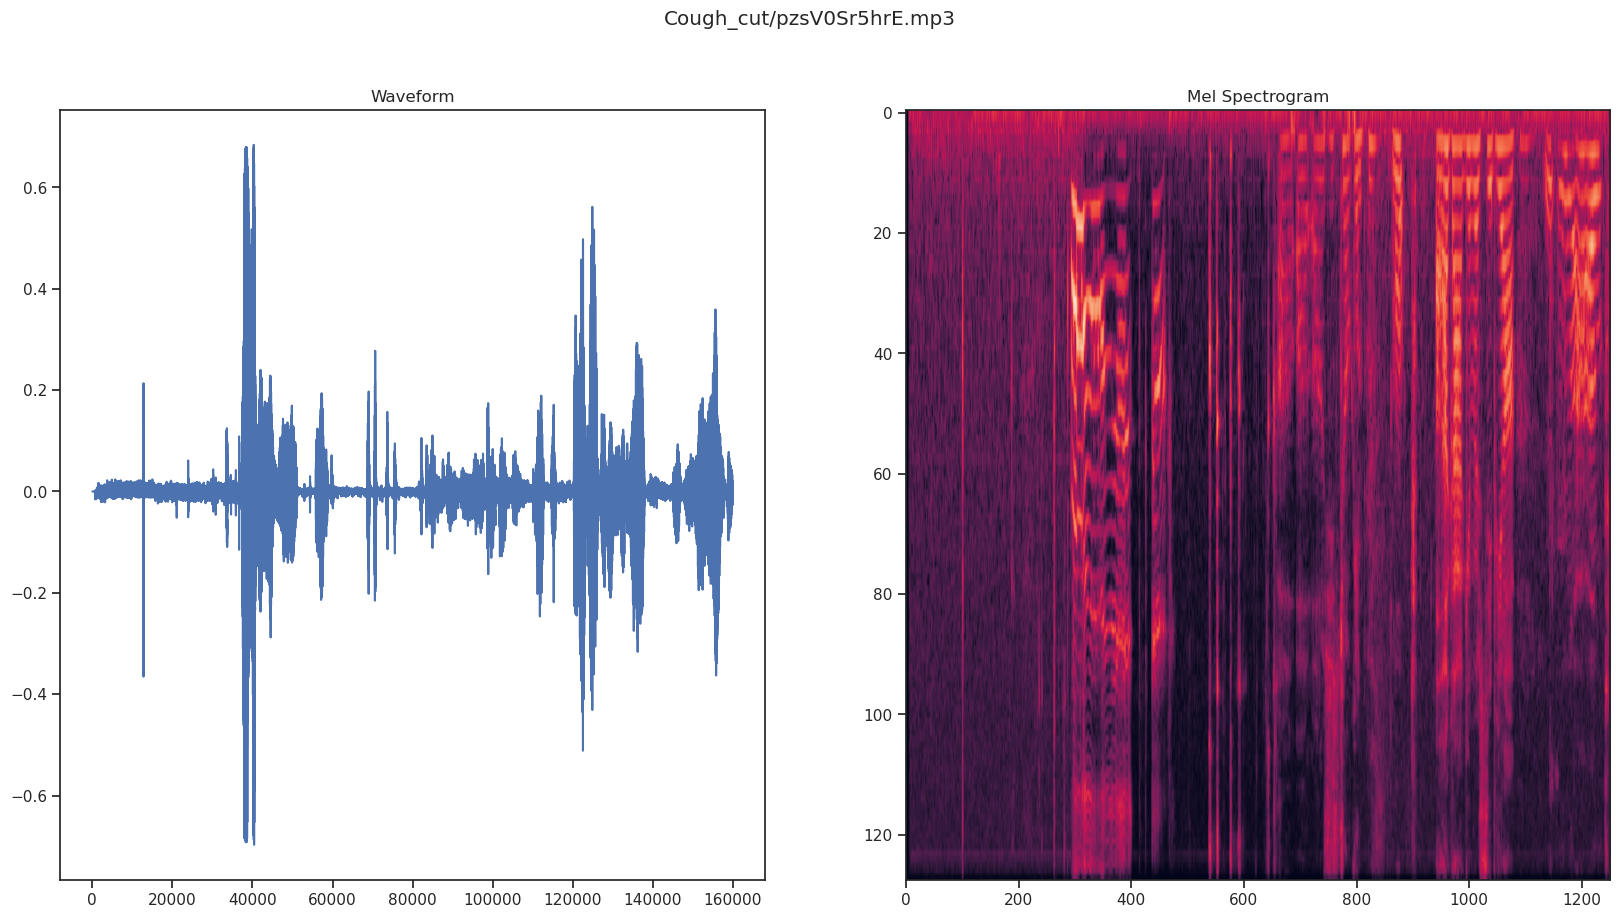

In [29]:
def plot_audio(mp3_path: str) -> None:
    """
    Using matplotlib and create_mel_spectrogram() write a function that takes a mp3_path and plots
    both the waveform (line plot of amplitudes) and the mel-spectrogram side-by-side as subplots.

    Use the path as a single main title for both subplots
    """

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    y, sr = librosa.load(mp3_path, sr=sample_rate)
    ax[0].plot(y)
    ax[0].set_title('Waveform')

    mel = create_mel_spectrogram(mp3_path)
    ax[1].imshow(mel, aspect='auto')
    ax[1].set_title('Mel Spectrogram')

    plt.suptitle(mp3_path)
    plt.show()


plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")